In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import set_config
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import tree,set_config
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier

In [2]:
pd.set_option('display.max_columns', 500)
set_config(print_changed_only = False)

In [3]:
data = pd.read_csv('glass.csv')

In [4]:
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [5]:
data.rename(columns = {'RI':'Refractive_Index','Na':'Sodium','Mg':'Magnesium','Al':'Aluminum','Si':'Silicon','K':'Potassium','Ca':'Calcium','Ba':'Barium','Fe':'Iron'}, inplace = True)

In [6]:
data.head()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


In [7]:
data.shape

(214, 10)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Refractive_Index  214 non-null    float64
 1   Sodium            214 non-null    float64
 2   Magnesium         214 non-null    float64
 3   Aluminum          214 non-null    float64
 4   Silicon           214 non-null    float64
 5   Potassium         214 non-null    float64
 6   Calcium           214 non-null    float64
 7   Barium            214 non-null    float64
 8   Iron              214 non-null    float64
 9   Type              214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [9]:
data.describe()

,Refractive_Index,Sodium,Magnesium,Aluminum,Silicon,Potassium,Calcium,Barium,Iron,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


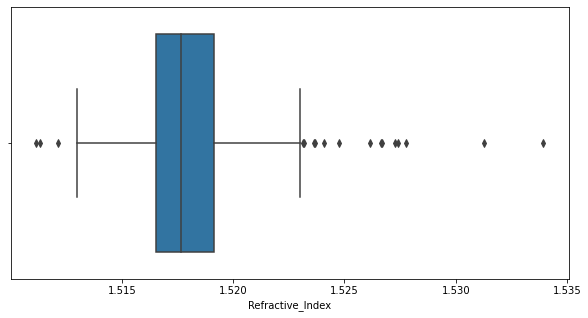

In [10]:
plt.figure(figsize = (10, 5))
sns.boxplot(x=data['Refractive_Index'])
plt.show()

In [11]:
# Count outlier in dataset
Q1 = data.quantile(0.25)
Q3 = data.quantile(0.75)
IQR = Q3 - Q1
((data < (Q1 - 1.5 * IQR)) | (data > (Q3 + 1.5 * IQR))).sum()

Refractive_Index    17
Sodium               7
Magnesium            0
Aluminum            18
Silicon             12
Potassium            7
Calcium             26
Barium              38
Iron                12
Type                29
dtype: int64

<ipython-input-12-65699ed7daec>:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(corr, dtype=np.bool)


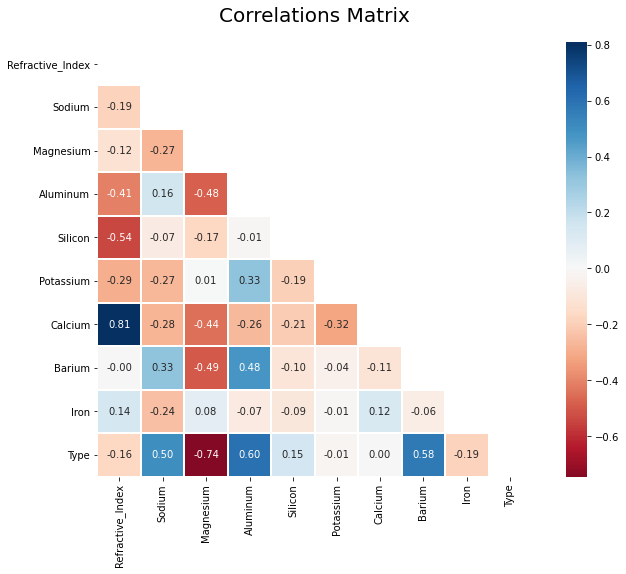

In [12]:
corr=data.corr()

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
plt.subplots(figsize = (12,8))
sns.heatmap(corr, 
            annot=True,
            cmap = 'RdBu',
            mask = mask,
            linewidths=.9, 
            linecolor='white',
            fmt='.2f',
            center = 0,
            square=True)
plt.title("Correlations Matrix", y = 1,fontsize = 20, pad = 20);

In [23]:
X = data.drop(["Type"],axis=1)
Y = data["Type"]
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=156)

In [24]:
DT_model = DecisionTreeClassifier(criterion='entropy')

In [25]:
DT = DT_model.fit(Train_X, Train_Y)
pred = DT.predict(Test_X)

In [26]:
def Classification_Summary(pred,pred_prob,i):
    Accuracy=round(accuracy_score(Test_Y, pred),3)*100   
    Precision =round(precision_score(Test_Y, pred, average='weighted'),3)*100 #
    Recall=round(recall_score(Test_Y, pred, average='weighted'),3)*100 #
    F1_score=round(f1_score(Test_Y, pred, average='weighted'),3)*100 #
    print('Accuracy = {}%'.format(round(accuracy_score(Test_Y, pred),3)*100))
    print('F1 Score = {}%'.format(round(f1_score(Test_Y, pred, average='weighted'),3)*100)) #
    print('\n \033[1mConfusiton Matrix:\033[0m\n',confusion_matrix(Test_Y, pred))
    print('\n\033[1mClassification Report:\033[0m\n',classification_report(Test_Y, pred))

In [27]:
pred_prob = DT.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

Accuracy = 72.1%
F1 Score = 71.0%

 Confusiton Matrix:
 [[13  0  2  0  0  0]
 [ 2  9  1  0  0  1]
 [ 2  0  1  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  1  0]
 [ 0  1  0  0  0  7]]

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.69      0.69      0.69        13
           3       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.88      0.88      0.88         8

    accuracy                           0.72        43
   macro avg       0.60      0.52      0.53        43
weighted avg       0.73      0.72      0.71        43



C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\App

In [28]:
pred_df=pd.DataFrame({'Actual Value':Test_Y,'Predicted Value':pred,'Difference':Test_Y-pred})
pred_df

,Actual Value,Predicted Value,Difference
89,2,2,0
205,7,7,0
0,1,3,-2
49,1,3,-2
152,3,1,2
18,1,1,0
50,1,1,0
134,2,2,0
114,2,2,0
9,1,1,0


In [29]:
RFC_model = RandomForestClassifier()

In [30]:
RFC = RFC_model.fit(Train_X, Train_Y)#.best_estimator_
pred_rf = RFC.predict(Test_X)

In [31]:
pred_prob = RFC.predict_proba(Test_X)
Classification_Summary(pred,pred_prob,1)

Accuracy = 72.1%
F1 Score = 71.0%

 Confusiton Matrix:
 [[13  0  2  0  0  0]
 [ 2  9  1  0  0  1]
 [ 2  0  1  0  0  0]
 [ 0  1  0  0  0  0]
 [ 0  2  0  0  1  0]
 [ 0  1  0  0  0  7]]

Classification Report:
               precision    recall  f1-score   support

           1       0.76      0.87      0.81        15
           2       0.69      0.69      0.69        13
           3       0.25      0.33      0.29         3
           5       0.00      0.00      0.00         1
           6       1.00      0.33      0.50         3
           7       0.88      0.88      0.88         8

    accuracy                           0.72        43
   macro avg       0.60      0.52      0.53        43
weighted avg       0.73      0.72      0.71        43



C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\1141\App

In [32]:
pred_df_RF=pd.DataFrame({'Actual Value':Test_Y,'Predicted Value':pred_rf,'Difference':Test_Y-pred_rf})
pred_df_RF

,Actual Value,Predicted Value,Difference
89,2,2,0
205,7,7,0
0,1,1,0
49,1,1,0
152,3,1,2
18,1,1,0
50,1,1,0
134,2,2,0
114,2,2,0
9,1,1,0
